<a href="https://colab.research.google.com/github/erialc-cal/StatApp_2020/blob/main/Fonctions_de_visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

On automatise toutes les visualisations faites dans ce notebook afin de voir les différents indicateurs à des niveaux d'agrégation temporels différents. 


In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
fqms=pd.read_csv(r'https://github.com/erialc-cal/StatApp_2020/raw/main/Data/FQMs/fqms_2016.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [30]:
histo = pd.read_csv('/content/histo_2016.csv')

# Formatage des niveaux d'agrégation

## Sur les histos

On dispose de la date. Il nous faut réaliser le découpage en Année, Mois et Semaine.


In [32]:
histo.head()

,Unnamed: 0,Jour,Horaire théorique,Horaire bloc,Compagnie,Code IATA compagnie,Code OACI compagnie,Numéro de vol,Faisceau facturation,Pays,Ville,Aéroport,Code aéroport IATA,Code aéroport OACI,Type de mouvement,Type avion,Sous-type avion,Plateforme,Plateforme code,Libellé plateforme,Aérogare,Libellé aérogare,Terminal,Libellé terminal,Nombre de mouvements réalisés,Nombre de vol atterris décollés,Nombre de passagers réalisés,Sièges Corrections_ICI
0,44353,2016-07-31,2016/07/31 16:10:00,2016/07/31 18:53:00,CUBANA,CU,CUB,CU445,International,CUBA,La Havane Jose Marti Intl,La Havane Jose Marti Intl,HAV,MUHA,Départ,IL9,I93,ORLY,ORY,Orly,ORYS,ORY SUD,ORYS,ORY SUD,1,1,252,262.0
1,44354,2016-03-30,2016/03/30 19:15:00,2016/03/30 19:33:00,HOP!,A5,HOP,A59601,Schengen,ESPAGNE,Valladolid,Valladolid,VLL,LEVD,Arrivée,CRJ,CR7,ORLY,ORY,Orly,ORYO,ORY OUEST,ORYW,ORY OUEST,1,1,43,50.0
2,44355,2016-01-23,2016/01/23 15:25:00,2016/01/23 16:57:00,CORSAIR INTL,SS,CRL,CRL990,International,SENEGAL,DAKAR,DAKAR,DKR,GOOY,Départ,330,332,ORLY,ORY,Orly,ORYS,ORY SUD,ORYS,ORY SUD,1,1,298,350.0
3,44356,2016-01-20,2016/01/20 19:20:00,2016/01/20 19:31:00,CORSAIR INTL,SS,CRL,CRL874,International,MADAGASCAR,Antananarivo,Antananarivo,TNR,FMMI,Départ,330,332,ORLY,ORY,Orly,ORYS,ORY SUD,ORYS,ORY SUD,1,1,149,350.0
4,44357,2016-01-05,2016/01/05 09:55:00,2016/01/05 09:41:00,CORSAIR INTL,SS,CRL,CRL925,Dom Tom,FRANCE MARTINIQUE,Fort De France Lamentin,Fort De France Lamentin,FDF,TFFF,Arrivée,330,333,ORLY,ORY,Orly,ORYS,ORY SUD,ORYS,ORY SUD,1,1,332,350.0


In [40]:
from datetime import datetime as dt
from tqdm import tqdm
histo = histo.astype({'Jour':'datetime64[ns]'})
histo['Annee']= histo['Jour'].dt.strftime('%Y')
histo['Mois']= histo['Jour'].dt.strftime('%m')
histo['Semaine']= histo['Jour'].dt.strftime('%U')

In [56]:
histo['Taux de remplissage réel']=histo['Nombre de passagers réalisés'].div(histo['Sièges Corrections_ICI'])

In [ ]:
histo['A/D']= histo['Type de mouvement']

In [68]:
histo['A/D'] = histo['A/D'].str.replace('Arrivée', 'A')
histo['A/D'] = histo['A/D'].str.replace('Départ','D')

## Sur les FQMs

In [6]:
fqms.head()

,Unnamed: 0,Jour,Tav,Cie,Ligne,A/D,Aérog,Hor,Sièges Corrections_ICI,Pax Estimés,Prov/Dst,Pays,Qualité,Crit. Douanier,Faisceau,LF%,IATA,Cpt Mvt,Faisc. IATA,Date du vol,NB Sieges specif,NB Sieges Standard,Date Equiv,CLE SYNTH.,%Rempl,Semaine,CLE S/T
0,0,1,320,EZY,4060,A,OS,08:00:00,180,129.60,NCE,FR,MTP,H,1,0.72,J,1,000A,2016-01-04,180,150,2015-01-05,OSA2,0.72,1,OS1A1
1,1,1,BEH,UD,450,A,OS,08:10:00,19,13.68,LPY,FR,MTP,H,1,0.72,J,1,000A,2016-01-04,19,8,2015-01-05,OSA2,0.72,1,OS1A1
2,2,1,320,EZY,4020,A,OS,10:00:00,180,129.60,TLS,FR,MTP,H,1,0.72,J,1,000A,2016-01-04,180,150,2015-01-05,OSA2,0.72,1,OS1A1
3,3,1,320,EZY,4062,A,OS,10:25:00,180,129.60,NCE,FR,MTP,H,1,0.72,J,1,000A,2016-01-04,180,150,2015-01-05,OSA2,0.72,1,OS1A1
4,4,1,320,EZY,4058,A,OS,11:20:00,180,129.60,NCE,FR,MTP,H,1,0.72,J,1,000A,2016-01-04,180,150,2015-01-05,OSA2,0.72,1,OS1A1


In [39]:
from datetime import datetime as dt
from tqdm import tqdm
fqms.astype({'Date du vol':'datetime64[ns]'})

fqms['Annee']= fqms['Date du vol'].dt.strftime('%Y')
fqms['Mois']= fqms['Date du vol'].dt.strftime('%m')
fqms['Semaine']= fqms['Date du vol'].dt.strftime('%U')
fqms['Semaine']=fqms['Date du vol'].dt.strftime('%U')


In [27]:
pd.unique(fqms['Annee']),pd.unique(fqms['Mois']), pd.unique(fqms['Semaine'])

(array([2016, 2017], dtype=object),
 array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype=object),
 array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
        '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
        '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33',
        '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44',
        '45', '46', '47', '48', '49', '50', '51', '52'], dtype=object))

# Fonctions de visualisation

Détail des variables de chaque base : 

**FQMs**
```
Variables pour agréger temporellement : 
- Date du vol (date complète)
- Semaine (correspond au numéro de la semaine)
- Annee (correspond à l'année entre 2016 et 2017)
- Mois (correspond au numéro du mois entre 1 et 12)

Autres variables d'agrégation : 
- Tav (type avion)
- Cie (compagnie aérienne)
- A/D
- Prov/Dst
- Aérog

Variables à visualiser :
- Sièges Corrections_ICI
- Pax Estimés
- %Rempl
- LF%

```


**Histo**
```
Variables pour agréger temporellement : 
- Jour (date complète)
- Semaine (correspond au numéro de la semaine)
- Annee (correspond à l'année entre 2016 et 2017)
- Mois (correspond au numéro du mois entre 1 et 12)

Autres variables d'agrégation : 
- Code aéroport IATA 
- Type avion
- Pays, Ville
- Numéro de vol
- Aéroport
- Aérogare, Plateforme, Terminal

Variables à visualiser :
- Nombre de passagers réalisés
- Taux de remplissage réel


```



In [55]:
histo.head()

,Unnamed: 0,Jour,Horaire théorique,Horaire bloc,Compagnie,Code IATA compagnie,Code OACI compagnie,Numéro de vol,Faisceau facturation,Pays,Ville,Aéroport,Code aéroport IATA,Code aéroport OACI,Type de mouvement,Type avion,Sous-type avion,Plateforme,Plateforme code,Libellé plateforme,Aérogare,Libellé aérogare,Terminal,Libellé terminal,Nombre de mouvements réalisés,Nombre de vol atterris décollés,Nombre de passagers réalisés,Sièges Corrections_ICI,Annee,Mois,Semaine
0,44353,2016-07-31,2016/07/31 16:10:00,2016/07/31 18:53:00,CUBANA,CU,CUB,CU445,International,CUBA,La Havane Jose Marti Intl,La Havane Jose Marti Intl,HAV,MUHA,Départ,IL9,I93,ORLY,ORY,Orly,ORYS,ORY SUD,ORYS,ORY SUD,1,1,252,262.0,2016,07,31
1,44354,2016-03-30,2016/03/30 19:15:00,2016/03/30 19:33:00,HOP!,A5,HOP,A59601,Schengen,ESPAGNE,Valladolid,Valladolid,VLL,LEVD,Arrivée,CRJ,CR7,ORLY,ORY,Orly,ORYO,ORY OUEST,ORYW,ORY OUEST,1,1,43,50.0,2016,03,13
2,44355,2016-01-23,2016/01/23 15:25:00,2016/01/23 16:57:00,CORSAIR INTL,SS,CRL,CRL990,International,SENEGAL,DAKAR,DAKAR,DKR,GOOY,Départ,330,332,ORLY,ORY,Orly,ORYS,ORY SUD,ORYS,ORY SUD,1,1,298,350.0,2016,01,03
3,44356,2016-01-20,2016/01/20 19:20:00,2016/01/20 19:31:00,CORSAIR INTL,SS,CRL,CRL874,International,MADAGASCAR,Antananarivo,Antananarivo,TNR,FMMI,Départ,330,332,ORLY,ORY,Orly,ORYS,ORY SUD,ORYS,ORY SUD,1,1,149,350.0,2016,01,03
4,44357,2016-01-05,2016/01/05 09:55:00,2016/01/05 09:41:00,CORSAIR INTL,SS,CRL,CRL925,Dom Tom,FRANCE MARTINIQUE,Fort De France Lamentin,Fort De France Lamentin,FDF,TFFF,Arrivée,330,333,ORLY,ORY,Orly,ORYS,ORY SUD,ORYS,ORY SUD,1,1,332,350.0,2016,01,01


In [80]:
def affichage_fqms_fsc(agregation, variable_affichee, func):
                # agregation : observation par semaine, par jour, par année, par mois... ou sur prov/dst par ex.
                # variable affichee : LF%, Nombre de passagers estimés, etc. 
                # Fonction d'agrégation : 'mean' pour LF%, 'sum' pour Pax Estimés etc. 
                
  sns.set(style='darkgrid')
  faisceaux =['SCH', 'INT', 'CEE', 'MTP', 'DTM']
  color=['blue', 'red', 'navy', 'gray', 'green']
  fig, ax = plt.subplots(2,1, sharex=False, figsize=(25,20))
  tm = ['Arrivée', 'Départ']

  fqms_a = fqms[fqms['A/D']=='A']
  fqms_d = fqms[fqms['A/D']=='D']
  for i in range(len(faisceaux)):
    #arrivées
    fqms_date_a = fqms_a[fqms_a['Qualité']==faisceaux[i]].groupby(agregation).agg({variable_affichee :func})
    fqms_date_a['index']=fqms_date_a.index
    sns.regplot(ax=ax[0], x=fqms_date_a.index, y=fqms_date_a[variable_affichee], color=color[i], fit_reg=False, label=faisceaux[i])
    sns.lineplot(ax=ax[0], x='index',y=variable_affichee, data=fqms_date_a, color=color[i], label=tm[0])
    #départs
    fqms_date_d = fqms_d[fqms_d['Qualité']==faisceaux[i]].groupby(agregation).agg({variable_affichee :func})
    fqms_date_d['index']=fqms_date_d.index
    sns.regplot(ax=ax[1], x=fqms_date_d.index, y=fqms_date_d[variable_affichee], color=color[i], fit_reg=False, label=faisceaux[i])
    sns.lineplot(ax=ax[1], x='index',y=variable_affichee, data=fqms_date_d, color=color[i],label=tm[1])
    
    ax[0].set(ylabel=variable_affichee)
    ax[1].set(ylabel=variable_affichee)

  plt.title("Evolution du {}".format(variable_affichee)+" selon les {}".format(agregation)+" par faisceaux")





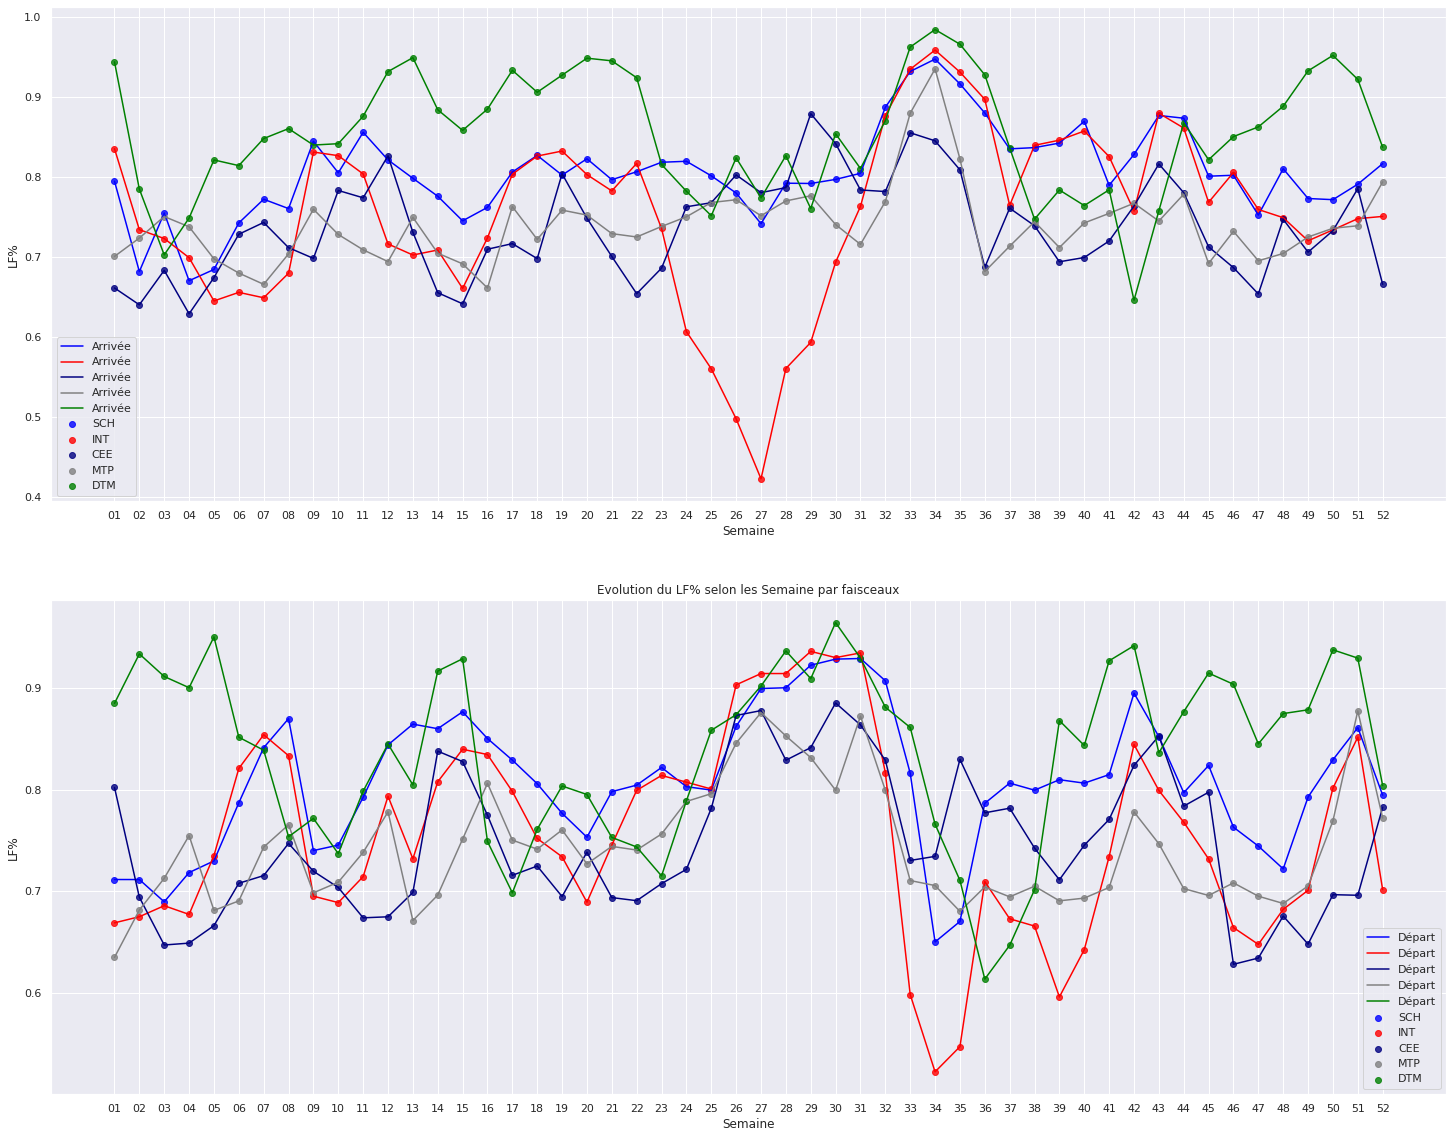

In [81]:
affichage_fqms_fsc('Semaine', 'LF%', 'mean')

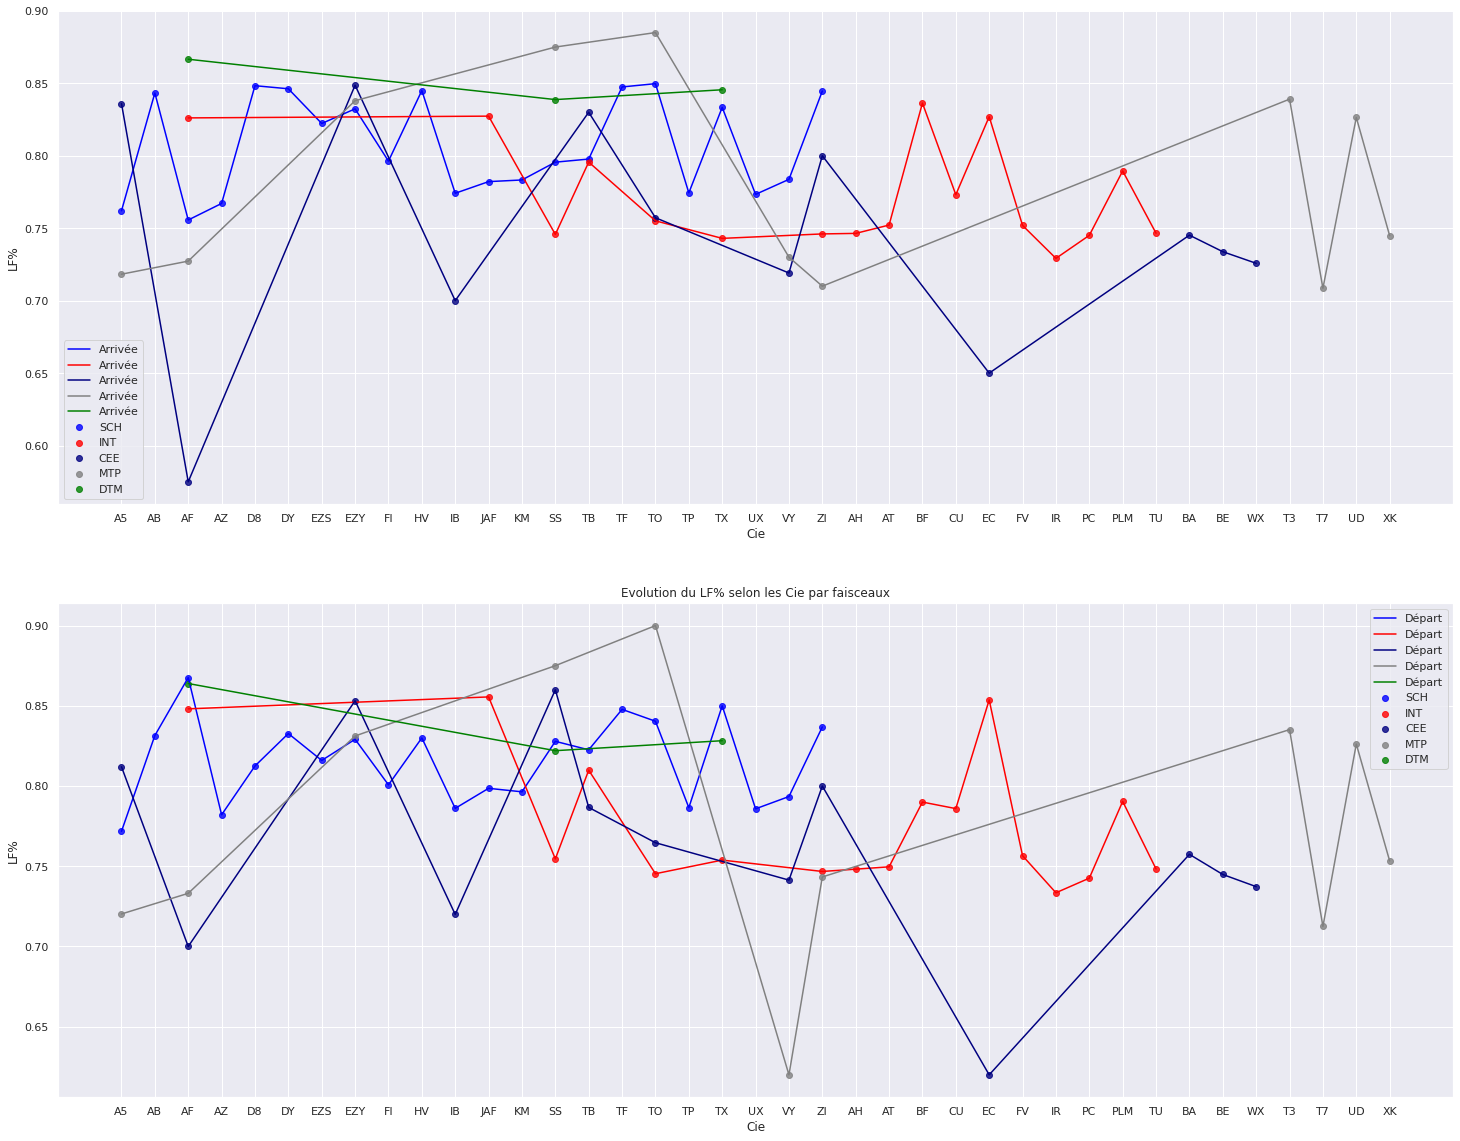

In [82]:
affichage_fqms_fsc('Cie', 'LF%', 'mean')

In [97]:
def compare_histo_fqms(agregation_temps,variable_fqms, variable_histo, func_agreg_fqms,func_agreg_histo):
  # agregation_temps prend la valeur de l'incrément de temps que l'on souhaite : date au jour, à la semaine, à l'année
  # variable_fqms prend la variable d'intérêt das fqms, variable histo celle dans histo
  # func_agreg_fqms est l'agrégation voulue sur les fqms (par ex le max, la somme, la moyenne etc.) de meme pour func_agreg_histo
  
  colors = ['red','blue'] 
  faisceaux2 =['SCH', 'INT', 'CEE', 'MTP', 'DTM'] #Codage des faisceaux dans fqms
  fig, axes = plt.subplots(nrows=3,ncols=2, figsize=(25,20))

  # sélection sur le type de mouvement
  histo_m = histo[histo['A/D']== 'A']
  fqms_m = fqms[fqms['A/D']== 'A']
  histo_d = histo[histo['A/D']== 'D']
  fqms_d = fqms[fqms['A/D']== 'D']

  histo_m[histo_m['Faisceau facturation'] == 'Schengen'].groupby(agregation_temps).agg({variable_histo:func_agreg_histo}).plot(ax = axes[0,0],legend=True, subplots=True, color=colors[0])
  fqms_m[fqms_m['Qualité'] == 'SCH'].groupby(agregation_temps).agg({variable_fqms:func_agreg_fqms}).plot(ax = axes[0,0],legend=True, subplots=True, color=colors[1])
  histo_d[histo_d['Faisceau facturation'] == 'Schengen'].groupby(agregation_temps).agg({variable_histo:func_agreg_histo}).plot(ax = axes[0,0],legend=True, subplots=True, color=colors[0], linestyle='--')
  fqms_d[fqms_d['Qualité'] == 'SCH'].groupby(agregation_temps).agg({variable_fqms:func_agreg_fqms}).plot(ax = axes[0,0],legend=True, subplots=True, color=colors[1], linestyle='--')
  
  axes[0,0].text(0,1,'En pointillé les départs, en lignes pleines les arrivées', fontsize=12, style='italic')
  axes[0,0].legend()
  axes[0,0].set_title('Faisceau de Schengen')

  histo_m[histo_m['Faisceau facturation'] == 'International'].groupby(agregation_temps).agg({variable_histo:func_agreg_histo}).plot(ax = axes[1,0],legend=True, subplots=True, color=colors[0])
  fqms_m[fqms_m['Qualité'] == 'INT'].groupby(agregation_temps).agg({variable_fqms:func_agreg_fqms}).plot(ax = axes[1,0],legend=True, subplots=True, color=colors[1])
  histo_d[histo_d['Faisceau facturation'] == 'International'].groupby(agregation_temps).agg({variable_histo:func_agreg_histo}).plot(ax = axes[1,0],legend=True, subplots=True, color=colors[0], linestyle='--')
  fqms_d[fqms_d['Qualité'] == 'INT'].groupby(agregation_temps).agg({variable_fqms:func_agreg_fqms}).plot(ax = axes[1,0],legend=True, subplots=True, color=colors[1], linestyle='--')
  
  axes[1,0].legend()
  axes[1,0].set_title('Faisceau International')

  histo_m[histo_m['Faisceau facturation'] == 'Autre UE'].groupby(agregation_temps).agg({variable_histo:func_agreg_histo}).plot(ax = axes[0,1],legend=True, subplots=True, color=colors[0])
  fqms_m[fqms_m['Qualité'] == 'CEE'].groupby(agregation_temps).agg({variable_fqms:func_agreg_fqms}).plot(ax = axes[0,1],legend=True, subplots=True, color=colors[1])
  histo_d[histo_d['Faisceau facturation'] == 'Autre UE'].groupby(agregation_temps).agg({variable_histo:func_agreg_histo}).plot(ax = axes[0,1],legend=True, subplots=True, color=colors[0], linestyle='--')
  fqms_d[fqms_d['Qualité'] == 'CEE'].groupby(agregation_temps).agg({variable_fqms:func_agreg_fqms}).plot(ax = axes[0,1],legend=True, subplots=True, color=colors[1], linestyle='--')
  
  axes[0,1].legend()
  axes[0,1].set_title("Faisceau du reste de l'UE")

  histo[histo['Faisceau facturation'] == 'National'].groupby(agregation_temps).agg({variable_histo:func_agreg_histo}).plot(ax = axes[1,1],legend=True, subplots=True, color=colors[0])
  fqms[fqms['Qualité'] == 'MTP'].groupby(agregation_temps).agg({variable_fqms:func_agreg_fqms}).plot(ax = axes[1,1],legend=True, subplots=True, color=colors[1])
  histo_d[histo_d['Faisceau facturation'] == 'National'].groupby(agregation_temps).agg({variable_histo:func_agreg_histo}).plot(ax = axes[1,1],legend=True, subplots=True, color=colors[0], linestyle='--')
  fqms_d[fqms_d['Qualité'] == 'MTP'].groupby(agregation_temps).agg({variable_fqms:func_agreg_fqms}).plot(ax = axes[1,1],legend=True, subplots=True, color=colors[1], linestyle='--')
  
  axes[1,1].legend()
  axes[1,1].set_title('Faisceau de métropole Française')

  histo[histo['Faisceau facturation'] == 'Dom Tom'].groupby(agregation_temps).agg({variable_histo:func_agreg_histo}).plot(ax = axes[2,0],legend=True, subplots=True, color=colors[0])
  fqms[fqms['Qualité'] == 'DTM'].groupby(agregation_temps).agg({variable_fqms:func_agreg_fqms}).plot(ax = axes[2,0],legend=True, subplots=True, color=colors[1])
  histo_d[histo_d['Faisceau facturation'] == 'Dom Tom'].groupby(agregation_temps).agg({variable_histo:func_agreg_histo}).plot(ax = axes[2,0],legend=True, subplots=True, color=colors[0], linestyle='--')
  fqms_d[fqms_d['Qualité'] == 'DTM'].groupby(agregation_temps).agg({variable_fqms:func_agreg_fqms}).plot(ax = axes[2,0],legend=True, subplots=True, color=colors[1], linestyle='--')
  
  axes[2,0].legend()
  axes[2,0].set_title('Faisceau des Dom Toms')

  histo.groupby(agregation_temps).agg({variable_histo:func_agreg_histo}).plot(ax = axes[2,1],legend=True, subplots=True, color=colors[0])
  fqms.groupby(agregation_temps).agg({variable_fqms:func_agreg_fqms}).plot(ax = axes[2,1],legend=True, subplots=True, color=colors[1])
  histo_d.groupby(agregation_temps).agg({variable_histo:func_agreg_histo}).plot(ax = axes[2,1],legend=True, subplots=True, color=colors[0], linestyle='--')
  fqms_d.groupby(agregation_temps).agg({variable_fqms:func_agreg_fqms}).plot(ax = axes[2,1],legend=True, subplots=True, color=colors[1], linestyle='--')
  
  axes[2,1].legend()
  axes[2,1].set_title('Tous faisceaux compris')


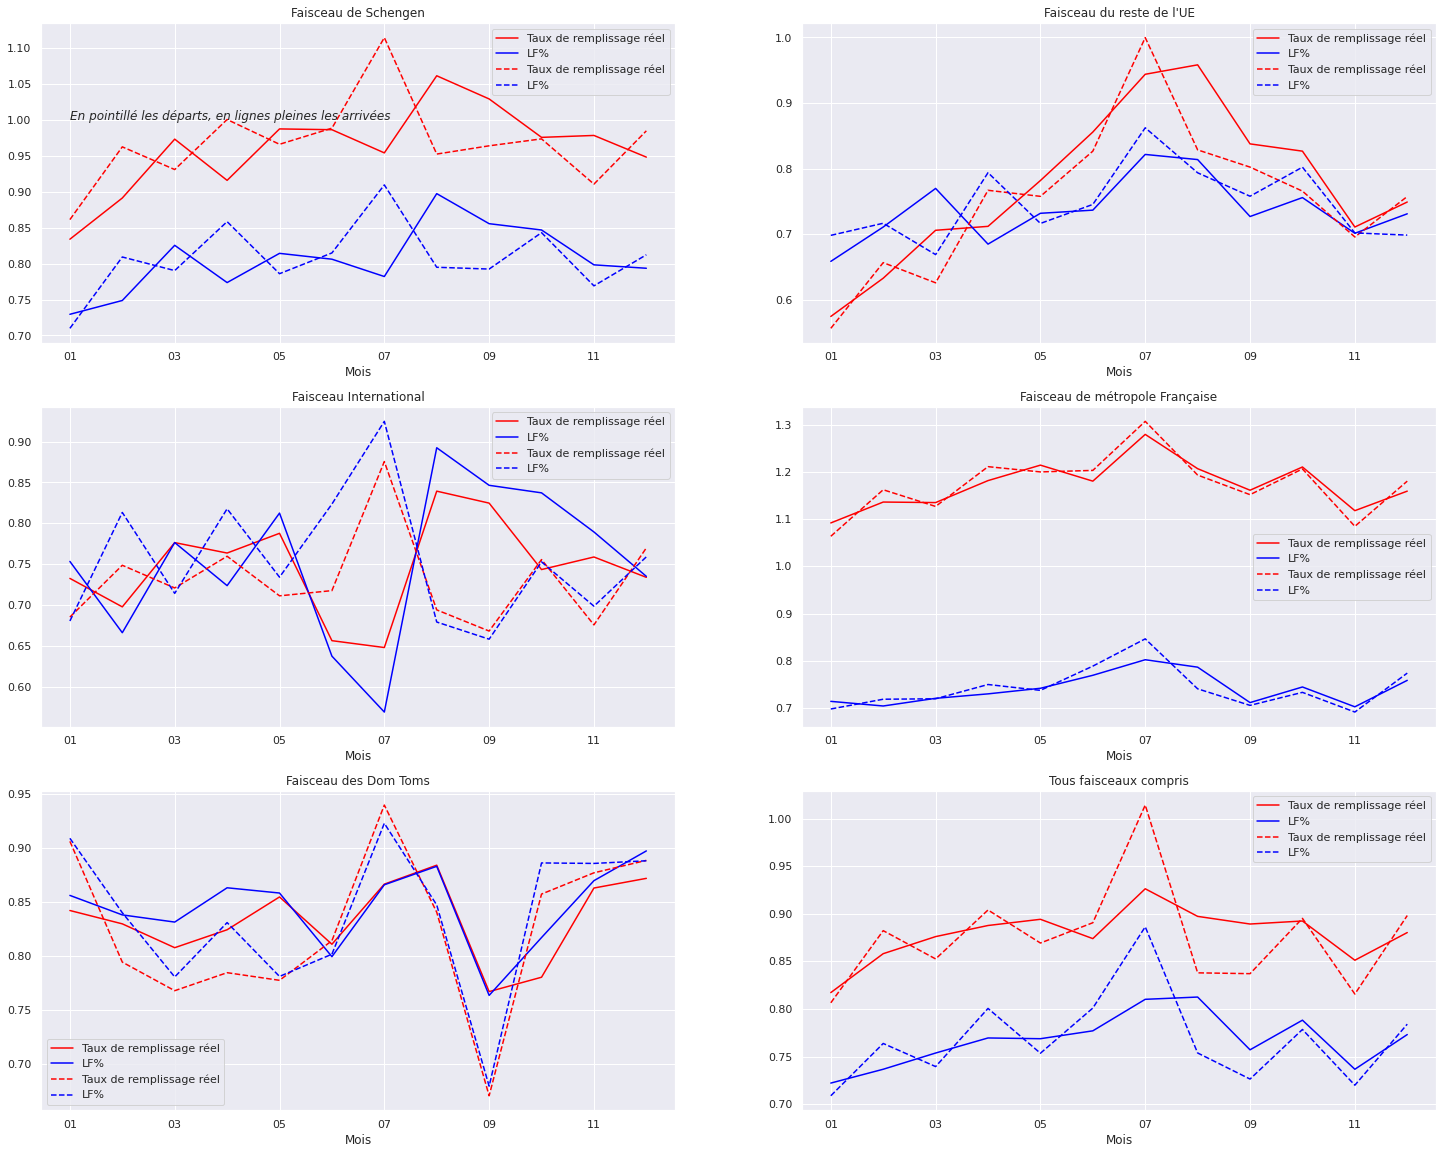

In [98]:
compare_histo_fqms('Mois','LF%', 'Taux de remplissage réel', 'mean', 'mean')

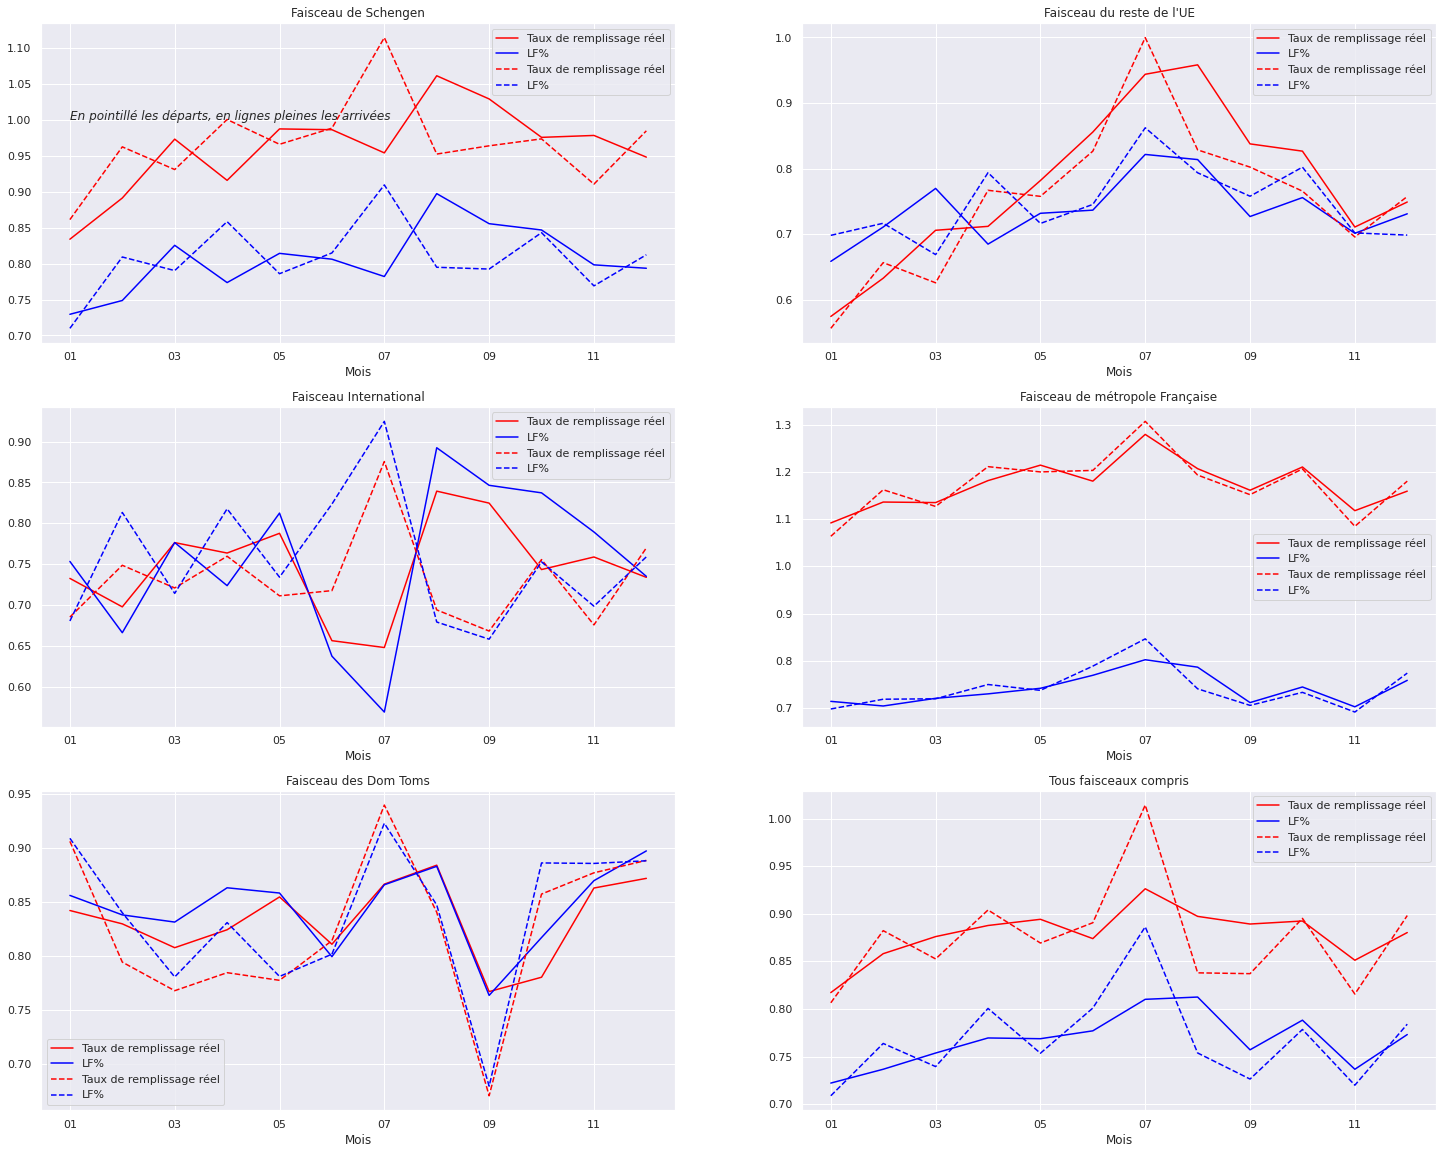

In [99]:
compare_histo_fqms('Mois','LF%', 'Taux de remplissage réel', 'mean', 'mean')